<a href="https://colab.research.google.com/github/NaufalYogaPratama/submission-ml-basics/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Naufal_Yoga_Pratama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/NaufalYogaPratama/submission-ml-basics/main/Ship_Performance_Dataset.csv")
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [ ]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [ ]:
df.isnull().sum()

,0
Date,0
Ship_Type,136
Route_Type,136
Engine_Type,136
Maintenance_Status,136
Speed_Over_Ground_knots,0
Engine_Power_kW,0
Distance_Traveled_nm,0
Draft_meters,0
Weather_Condition,136


In [ ]:
def explore_Categorical(df):
    print("Unique Values in Categorical Columns:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"\n{col}:")
        print(df[col].value_counts())
    return

In [ ]:
explore_Categorical(df)

Unique Values in Categorical Columns:

Date:
Date
2023-06-04    48
2023-12-24    48
2024-01-07    48
2024-01-14    48
2024-01-21    48
2024-01-28    48
2024-02-04    48
2024-02-11    48
2024-02-18    48
2024-02-25    48
2024-03-03    48
2024-03-10    48
2024-03-17    48
2024-03-24    48
2024-03-31    48
2024-04-07    48
2024-04-14    48
2024-04-21    48
2024-04-28    48
2024-05-05    48
2024-05-12    48
2024-05-19    48
2024-05-26    48
2024-06-02    48
2024-06-09    48
2024-06-16    48
2024-06-23    48
2023-12-31    48
2023-12-17    48
2023-06-11    48
2023-12-10    48
2023-06-18    48
2023-06-25    48
2023-07-02    48
2023-07-09    48
2023-07-16    48
2023-07-23    48
2023-07-30    48
2023-08-06    48
2023-08-13    48
2023-08-20    48
2023-08-27    48
2023-09-03    48
2023-09-10    48
2023-09-17    48
2023-09-24    48
2023-10-01    48
2023-10-08    48
2023-10-15    48
2023-10-22    48
2023-10-29    48
2023-11-05    48
2023-11-12    48
2023-11-19    48
2023-11-26    48
2023-12-03    4

In [ ]:
def Distribution_Numerical(df):
    print("Distribution of Numerical Variables:")
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_columns].hist(figsize=(15, 10), bins=20)
    plt.tight_layout()
    plt.show()

    print("Correlation Heatmap:")
    plt.figure(figsize=(15, 10))
    sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    print("Box Plots for Numerical Variables:")
    df[numerical_columns].boxplot(figsize=(10, 5))
    plt.title("Box Plots of Numerical Variables")
    plt.xticks(rotation=45)
    plt.show()
    return

Distribution of Numerical Variables:


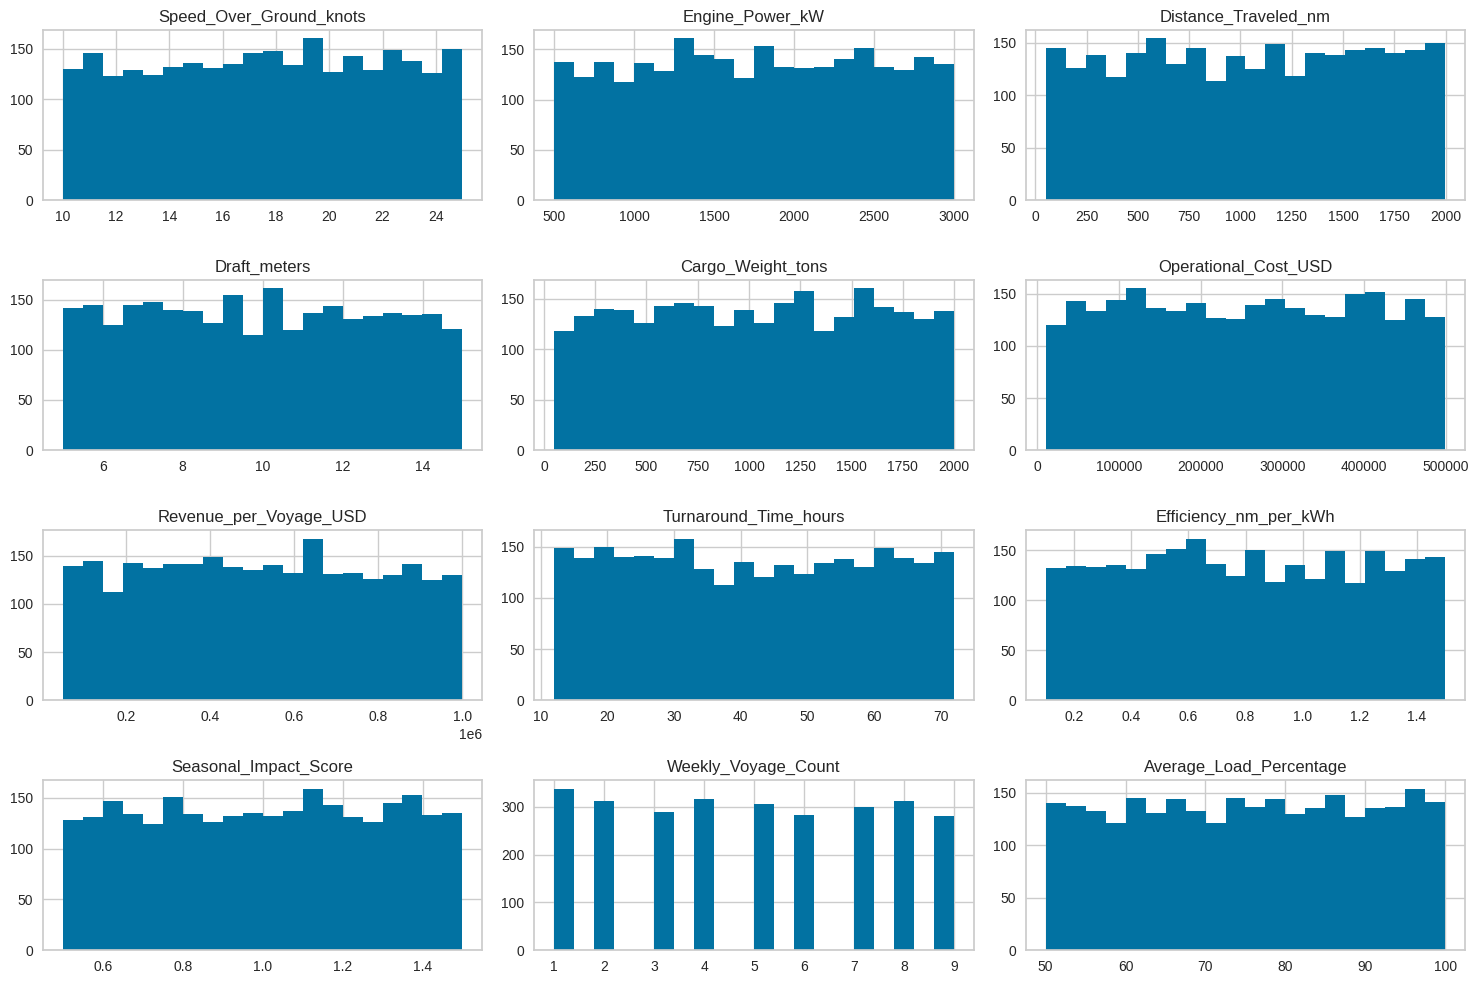

Correlation Heatmap:


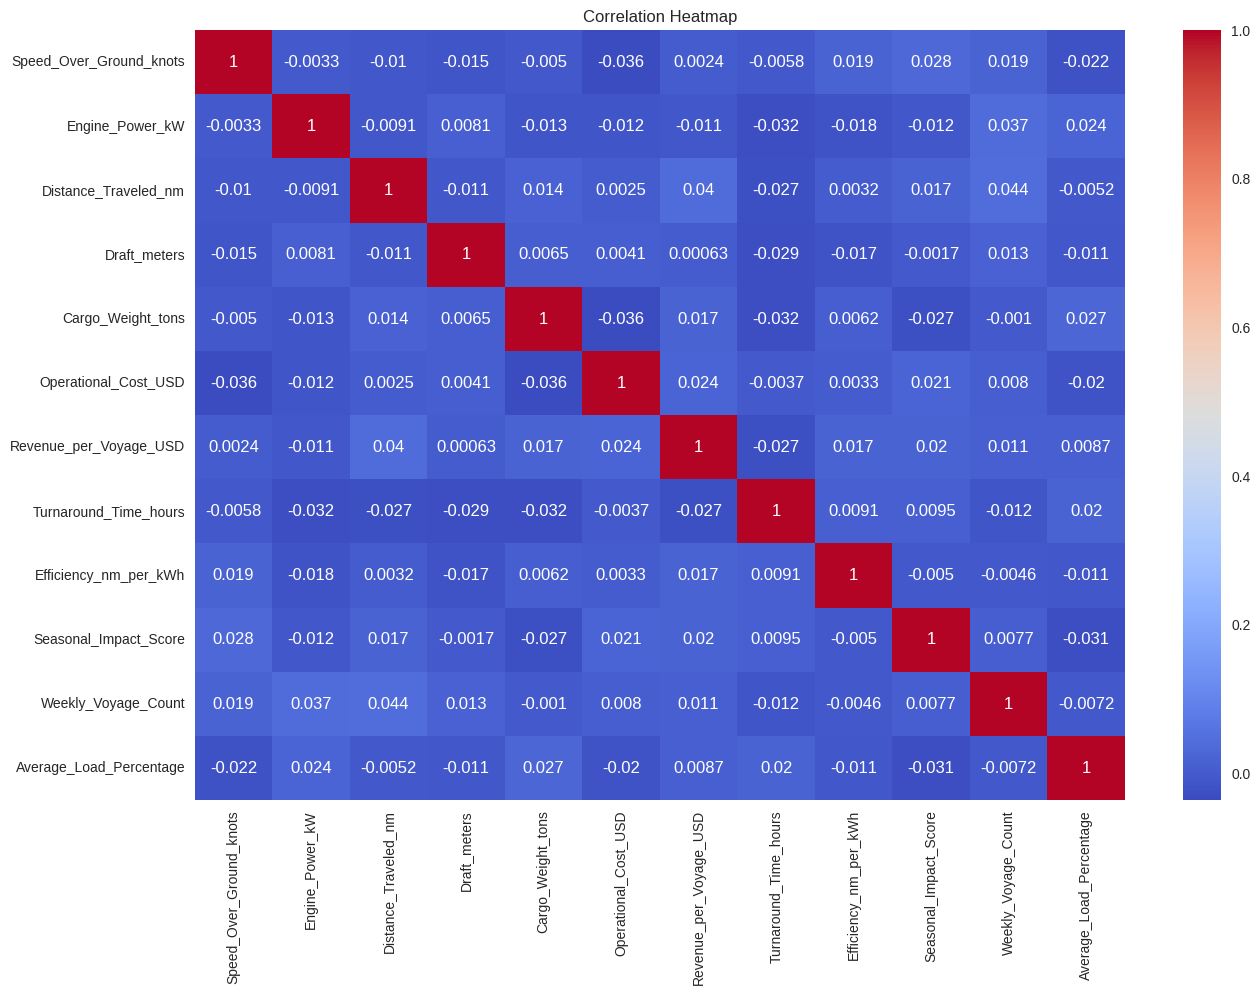

Box Plots for Numerical Variables:


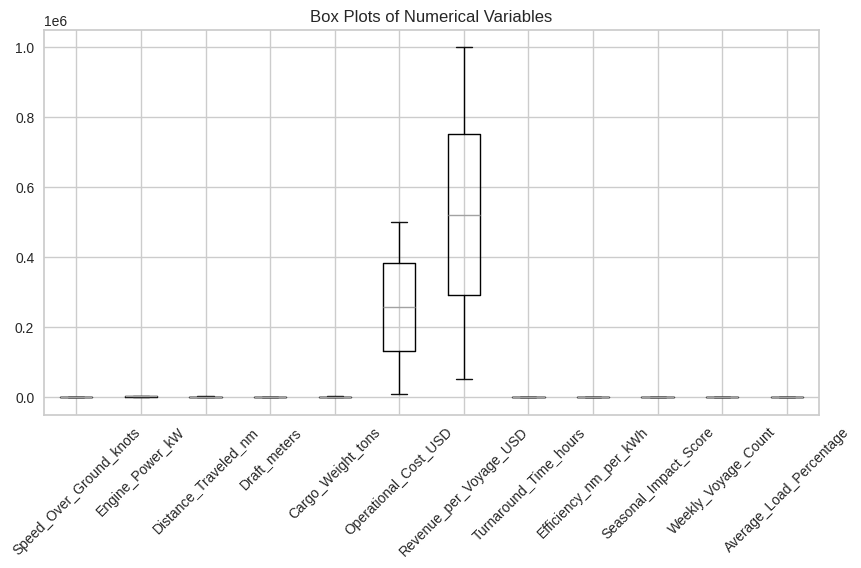

In [ ]:
Distribution_Numerical(df)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. Menangani Data yang Hilang

In [ ]:
df.ffill(inplace=True)
df.bfill(inplace=True)

In [ ]:
df.isnull().sum()

,0
Ship_Type,0
Route_Type,0
Engine_Type,0
Maintenance_Status,0
Speed_Over_Ground_knots,0
Engine_Power_kW,0
Distance_Traveled_nm,0
Draft_meters,0
Weather_Condition,0
Cargo_Weight_tons,0


2. Standarisasi Data Numerikal

In [ ]:
selected_features = ['Speed_Over_Ground_knots', 'Engine_Type']
subset_df = df[selected_features].copy()  # Buat salinan untuk menghindari modifikasi df asli

In [ ]:
# Standarisasi fitur numerik
scaler = StandardScaler()
numerical_features = ['Speed_Over_Ground_knots']
subset_df[numerical_features] = scaler.fit_transform(subset_df[numerical_features])

3. Encoding Data Kategorikal

In [ ]:
# One-Hot Encoding fitur kategorikal
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False untuk membuat array biasa
categorical_features = ['Engine_Type']
encoded_data = encoder.fit_transform(subset_df[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

4. Binning Data

In [ ]:
subset_df = subset_df.reset_index(drop=True)  # Reset indeks subset_df
encoded_df = encoded_df.reset_index(drop=True)  # Reset indeks encoded_df

# Gabungkan data yang telah dipreprocessing
preprocessed_subset_df = pd.concat([subset_df[numerical_features], encoded_df], axis=1)
preprocessed_subset_df

,Speed_Over_Ground_knots,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine
0,-1.161003,0.0,1.0,0.0
1,-1.673617,0.0,0.0,1.0
2,0.729934,1.0,0.0,0.0
3,0.800762,0.0,0.0,1.0
4,-0.895364,1.0,0.0,0.0
...,...,...,...,...
2731,-1.390536,0.0,1.0,0.0
2732,-0.869845,0.0,1.0,0.0
2733,-0.183047,0.0,0.0,1.0
2734,1.282657,0.0,1.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Inisialisasi variabel untuk menyimpan model terbaik
best_k = 2
best_kmeans = None
best_score = -1  # Ganti lowest_score menjadi best_score

# K-Means Clustering max 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessed_subset_df)  # Fit model KMeans
    labels_kmeans = kmeans.labels_  # Dapatkan label cluster
    score_kmeans = silhouette_score(preprocessed_subset_df, labels_kmeans)

    # Update model terbaik jika score lebih tinggi
    if score_kmeans > best_score:
        best_score = score_kmeans
        best_k = k
        best_kmeans = kmeans

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

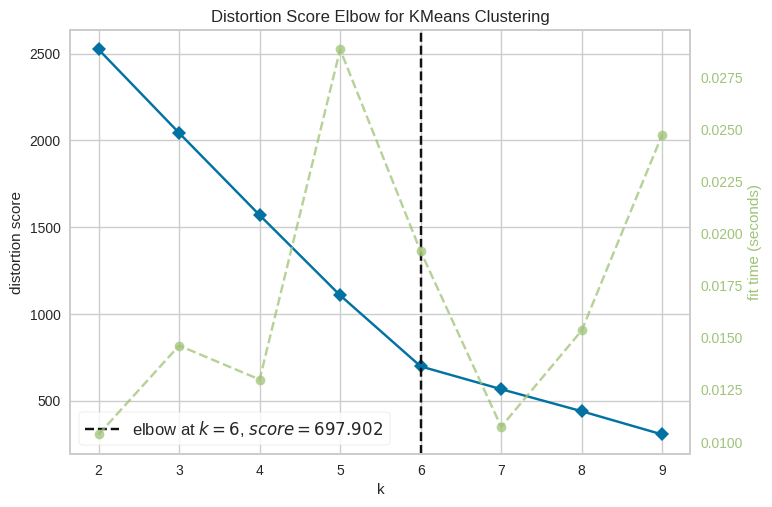

Silhouette Score (k=9): 0.5884469488745062


In [ ]:
# Elbow Method
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10)) # Gunakan KMeans baru untuk visualisasi
visualizer.fit(preprocessed_subset_df)
visualizer.show()

# Silhouette Score (menggunakan model terbaik)
silhouette_avg = silhouette_score(preprocessed_subset_df, best_kmeans.labels_)
print(f"Silhouette Score (k={best_k}): {silhouette_avg}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Pilih k fitur terbaik berdasarkan korelasi dengan label cluster
selector = SelectKBest(f_classif, k=3)  # Pilih 3 fitur terbaik
selected_features = selector.fit_transform(preprocessed_subset_df, best_kmeans.labels_)

# Dapatkan nama fitur yang dipilih
selected_feature_names = preprocessed_subset_df.columns[selector.get_support()]

# Latih ulang model K-Means dengan fitur yang dipilih
kmeans_selected = KMeans(n_clusters=best_k, random_state=42)
kmeans_selected.fit(selected_features)

# Evaluasi model
silhouette_avg_selected = silhouette_score(selected_features, kmeans_selected.labels_)
print(f"Silhouette Score (dengan feature selection): {silhouette_avg_selected}")

Silhouette Score (dengan feature selection): 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

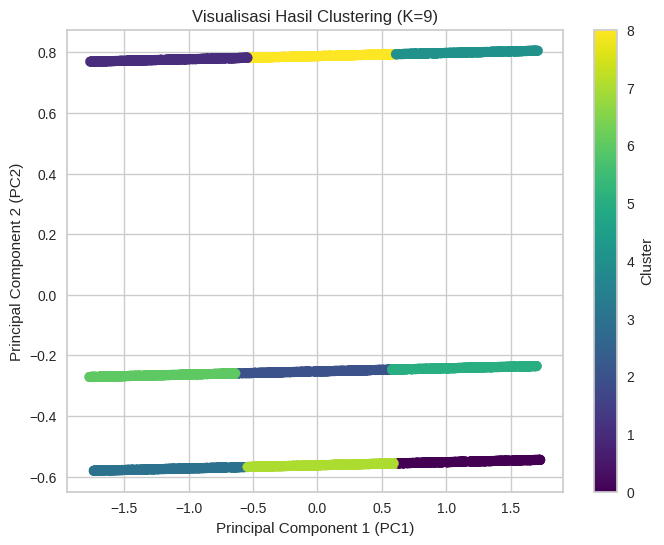

In [ ]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(preprocessed_subset_df)

# Buat scatter plot dengan warna berdasarkan label cluster
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=best_kmeans.labels_, cmap='viridis')
plt.title(f'Visualisasi Hasil Clustering (K={best_k})')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster')  # Menambahkan colorbar untuk label cluster
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
def analyze_clusters(df, cluster_column='cluster', features=['Speed_Over_Ground_knots', 'Engine_Type']):
    """
    Menganalisis karakteristik setiap cluster berdasarkan fitur yang diberikan.

    Args:
        df (pd.DataFrame): DataFrame yang berisi data dan label cluster.
        cluster_column (str): Nama kolom yang berisi label cluster.
        features (list): Daftar fitur yang ingin dianalisis.

    """
    print("Analisis Karakteristik Setiap Cluster:")
    num_clusters = df[cluster_column].nunique()  # Jumlah cluster

    for cluster_id in range(num_clusters):
        print(f"\nCluster {cluster_id + 1}:")
        cluster_data = df[df[cluster_column] == cluster_id]  # Data untuk cluster saat ini

        for feature in features:
            if pd.api.types.is_numeric_dtype(cluster_data[feature]):
                mean_value = cluster_data[feature].mean()  # Rata-rata fitur dalam cluster
                print(f"Rata-rata {feature}: {mean_value:.2f}")
            else:
                mode_value = cluster_data[feature].mode()[0]  # Modus fitur dalam cluster
                print(f"Modus {feature}: {mode_value}")

# Gabungkan label cluster ke DataFrame asli
df['cluster'] = best_kmeans.labels_  # Menggunakan best_kmeans

# Analisis karakteristik setiap cluster
analyze_clusters(df)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Speed_Over_Ground_knots: 22.63
Modus Engine_Type: Heavy Fuel Oil (HFO)

Cluster 2:
Rata-rata Speed_Over_Ground_knots: 12.85
Modus Engine_Type: Diesel

Cluster 3:
Rata-rata Speed_Over_Ground_knots: 17.63
Modus Engine_Type: Steam Turbine

Cluster 4:
Rata-rata Speed_Over_Ground_knots: 12.62
Modus Engine_Type: Heavy Fuel Oil (HFO)

Cluster 5:
Rata-rata Speed_Over_Ground_knots: 22.62
Modus Engine_Type: Diesel

Cluster 6:
Rata-rata Speed_Over_Ground_knots: 22.55
Modus Engine_Type: Steam Turbine

Cluster 7:
Rata-rata Speed_Over_Ground_knots: 12.31
Modus Engine_Type: Steam Turbine

Cluster 8:
Rata-rata Speed_Over_Ground_knots: 17.69
Modus Engine_Type: Heavy Fuel Oil (HFO)

Cluster 9:
Rata-rata Speed_Over_Ground_knots: 17.81
Modus Engine_Type: Diesel


# Analisis Karakteristik Setiap Cluster

## Cluster 1  
- **Rata-rata Speed_Over_Ground_knots**: 22.63  
- **Modus Engine_Type**: Heavy Fuel Oil (HFO)  
- **Analisis**:  
  Cluster ini mencakup kapal dengan kecepatan tinggi dan menggunakan bahan bakar *Heavy Fuel Oil (HFO)*.  
  Kapal dalam kelompok ini kemungkinan besar adalah kapal yang membutuhkan kecepatan tinggi untuk perjalanan yang lebih cepat, seperti kapal kargo ekspres atau kapal penumpang.  

## Cluster 2  
- **Rata-rata Speed_Over_Ground_knots**: 12.85  
- **Modus Engine_Type**: Diesel  
- **Analisis**:  
  Kapal dalam cluster ini memiliki kecepatan rendah dan menggunakan mesin *Diesel*.  
  Ini menunjukkan bahwa kapal ini mungkin termasuk dalam kategori kapal pengangkut barang berat atau kapal dengan efisiensi bahan bakar yang lebih tinggi untuk perjalanan jarak jauh dengan konsumsi energi yang lebih rendah.  

## Cluster 3  
- **Rata-rata Speed_Over_Ground_knots**: 17.63  
- **Modus Engine_Type**: Steam Turbine  
- **Analisis**:  
  Cluster ini terdiri dari kapal dengan kecepatan menengah dan menggunakan mesin *Steam Turbine*.  
  Kapal dalam kelompok ini mungkin lebih cocok untuk perjalanan jarak jauh yang membutuhkan daya tahan tinggi dan stabilitas dalam operasionalnya.  

## Cluster 4  
- **Rata-rata Speed_Over_Ground_knots**: 12.62  
- **Modus Engine_Type**: Heavy Fuel Oil (HFO)  
- **Analisis**:  
  Kapal dalam cluster ini memiliki kecepatan rendah tetapi menggunakan *Heavy Fuel Oil (HFO)*.  
  Ini menunjukkan bahwa kapal dalam kelompok ini kemungkinan besar merupakan kapal besar seperti tanker atau kapal kargo besar yang mengutamakan kapasitas muatan dan efisiensi bahan bakar dibandingkan kecepatan.  

## Cluster 5  
- **Rata-rata Speed_Over_Ground_knots**: 22.62  
- **Modus Engine_Type**: Diesel  
- **Analisis**:  
  Kapal dalam cluster ini memiliki kecepatan tinggi dengan mesin *Diesel*, menandakan bahwa mereka mungkin merupakan kapal kargo ekspres atau kapal penumpang yang mengutamakan efisiensi bahan bakar tetapi tetap mempertahankan kecepatan tinggi dalam perjalanan.  

## Cluster 6  
- **Rata-rata Speed_Over_Ground_knots**: 22.55  
- **Modus Engine_Type**: Steam Turbine  
- **Analisis**:  
  Kapal dengan kecepatan tinggi dan menggunakan mesin *Steam Turbine*.  
  Ini menunjukkan bahwa kapal dalam kelompok ini mungkin digunakan untuk transportasi yang membutuhkan daya tinggi dan kecepatan, seperti kapal perang atau kapal penumpang cepat.  

## Cluster 7  
- **Rata-rata Speed_Over_Ground_knots**: 12.31  
- **Modus Engine_Type**: Steam Turbine  
- **Analisis**:  
  Kapal dengan kecepatan rendah dan menggunakan mesin *Steam Turbine*.  
  Kapal dalam cluster ini mungkin termasuk kapal yang lebih tua atau kapal yang dirancang untuk efisiensi energi daripada kecepatan, seperti kapal angkut besar yang sering digunakan dalam rute perdagangan jarak jauh.  

## Cluster 8  
- **Rata-rata Speed_Over_Ground_knots**: 17.69  
- **Modus Engine_Type**: Heavy Fuel Oil (HFO)  
- **Analisis**:  
  Kapal dengan kecepatan menengah dan menggunakan *Heavy Fuel Oil (HFO)*.  
  Ini menunjukkan bahwa kapal ini mungkin termasuk kapal dagang yang seimbang antara efisiensi bahan bakar dan kecepatan, seperti kapal tanker menengah atau kapal kargo.  

## Cluster 9  
- **Rata-rata Speed_Over_Ground_knots**: 17.81  
- **Modus Engine_Type**: Diesel  
- **Analisis**:  
  Kapal dalam cluster ini memiliki kecepatan menengah dengan mesin *Diesel*.  
  Kapal dalam kelompok ini mungkin kapal angkut komersial yang tidak terlalu cepat tetapi tetap mengutamakan efisiensi bahan bakar dalam operasionalnya.  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Ekspor DataFrame ke file CSV
df.to_csv('ship_performance_clustered.csv', index=False)